# Imports

In [32]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import seaborn as sns
import statsmodels.api as sm
# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
#pmdarima
from pmdarima import auto_arima 
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

df_a = pd.read_csv('Data/app-store-apple-data-set-10k-apps/AppleStore.csv')
df_a_d = pd.read_csv('Data/app-store-apple-data-set-10k-apps/appleStore_description.csv')
df_g = pd.read_csv('Data/google-play-store-apps/googleplaystore.csv')
df_g_d = pd.read_csv('Data/google-play-store-apps/googleplaystore_user_reviews.csv')


In [3]:
df_a.shape, df_a_d.shape , df_g.shape, df_g_d.shape

((7197, 17), (7197, 4), (10841, 13), (64295, 5))

In [7]:
df_g.columns , df_g_d.columns

(Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver'],
       dtype='object'),
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
        'Sentiment_Subjectivity'],
       dtype='object'))

# Apple

In [6]:
df_a.columns, df_a_d.columns

(Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
        'rating_count_tot', 'rating_count_ver', 'user_rating',
        'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
        'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
       dtype='object'),
 Index(['id', 'track_name', 'size_bytes', 'app_desc'], dtype='object'))

In [13]:
df_a_d.shape

(7197, 4)

In [29]:
df_a[df_a.track_name == df_a_d.track_name]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [21]:
df_a_d.head(1)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."


In [23]:
df_a_d.set_index('id', inplace=True)
df_a.set_index('id', inplace=True)

In [33]:
df_a_all = df_a.join(df_a_d, how='right', lsuffix='id')

In [4]:
df_a_all.columns, df_a_all.shape

(Index(['Unnamed: 0', 'idid', 'track_nameid', 'size_bytesid', 'currency',
        'price', 'rating_count_tot', 'rating_count_ver', 'user_rating',
        'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
        'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'id',
        'track_name', 'size_bytes', 'app_desc'],
       dtype='object'), (7197, 21))

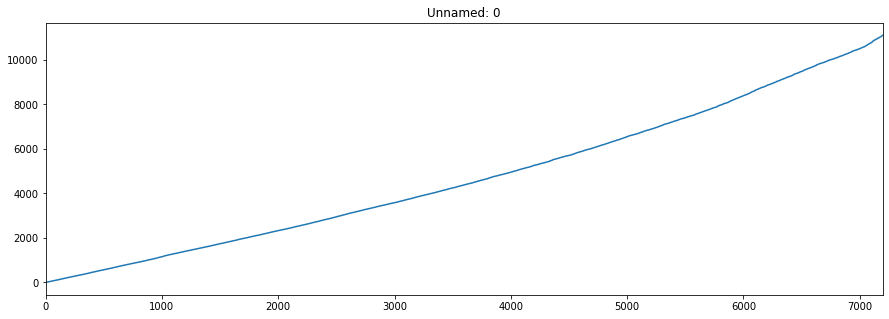

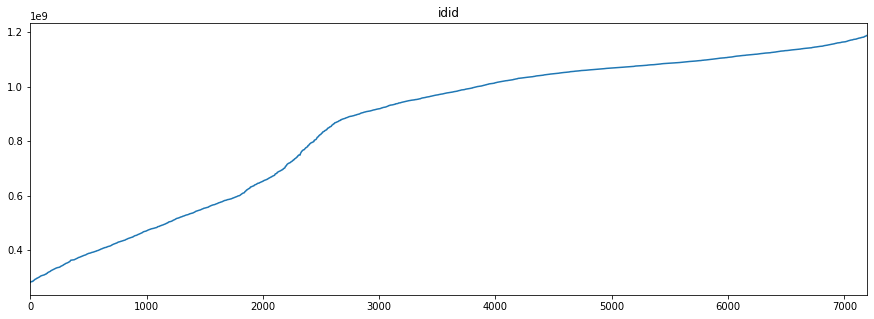

could not graph: track_nameid


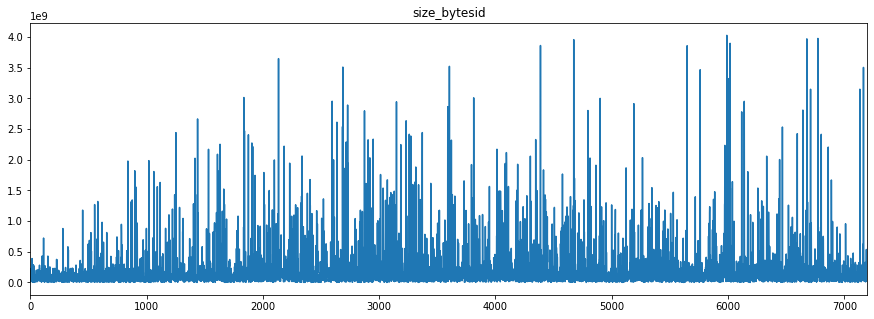

could not graph: currency


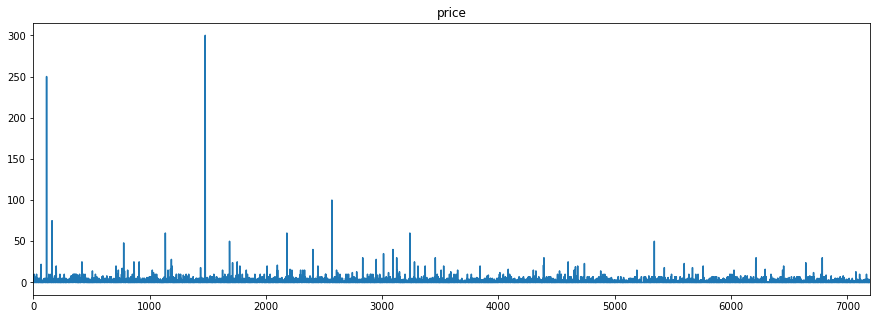

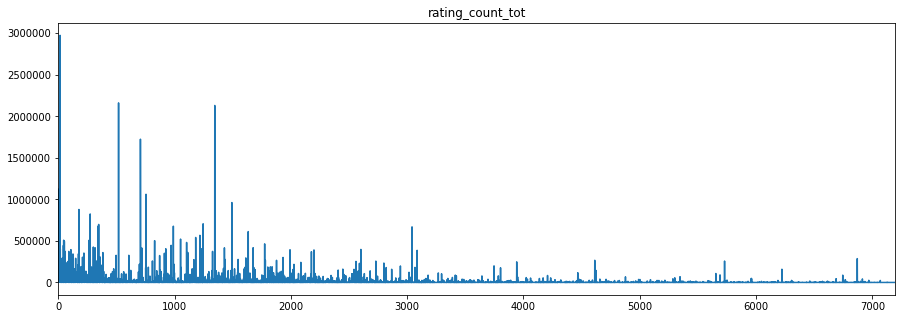

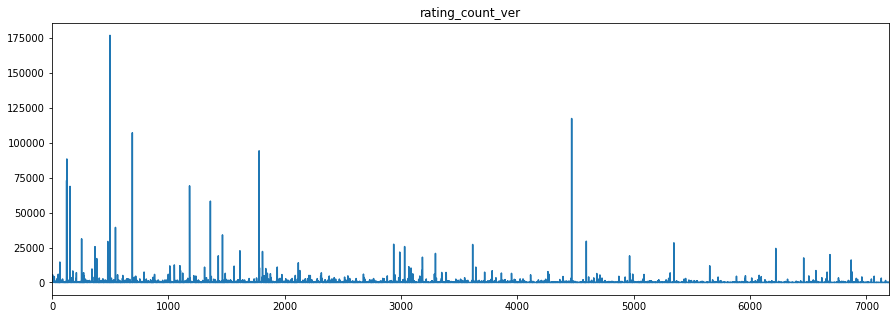

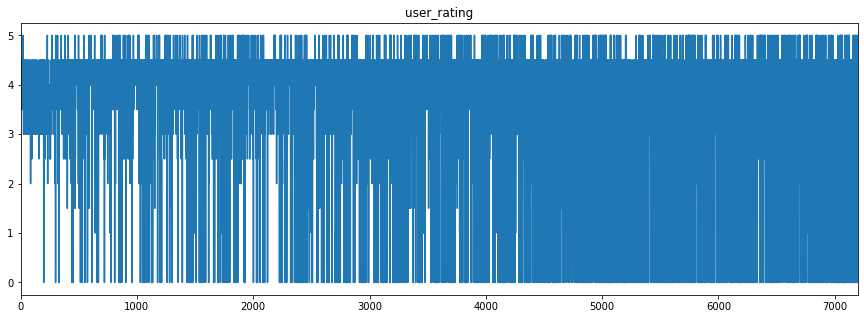

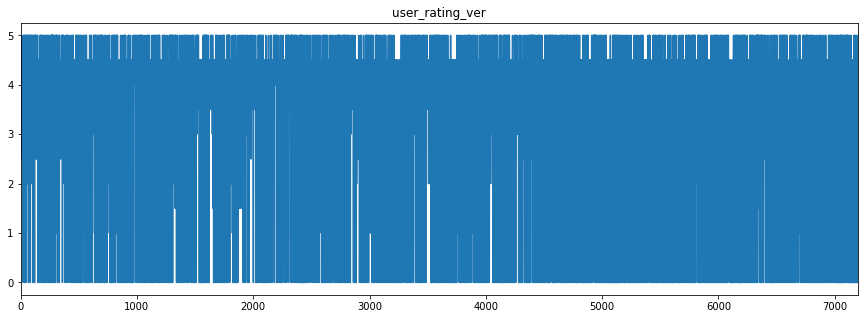

could not graph: ver


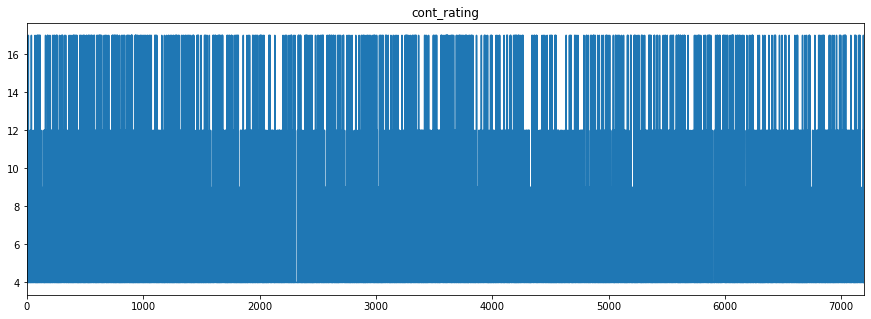

could not graph: prime_genre


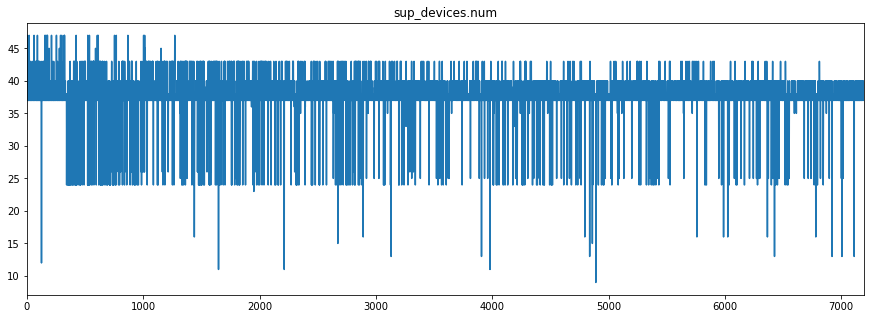

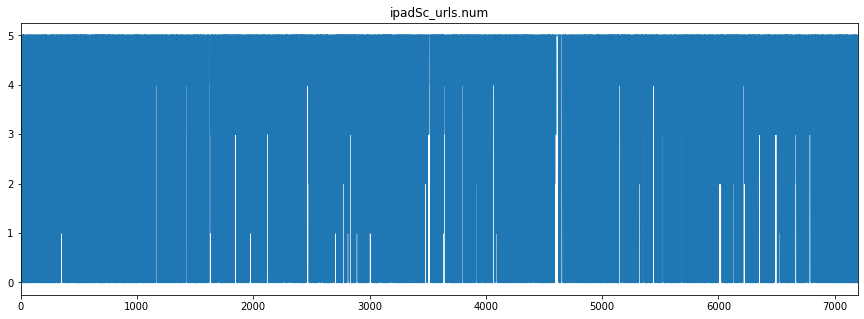

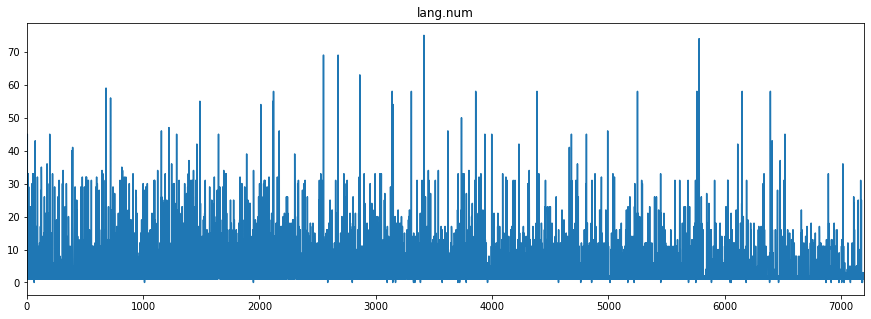

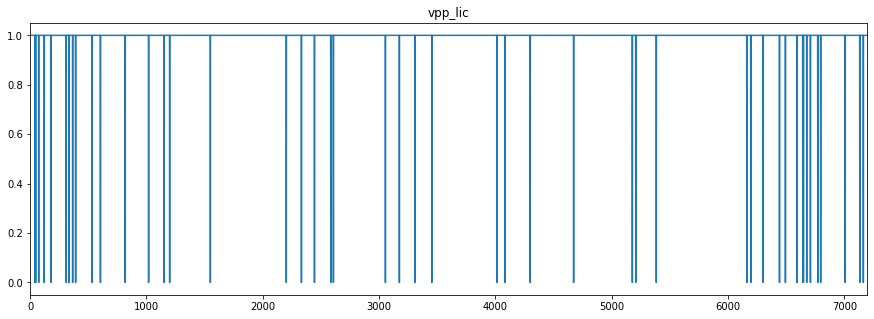

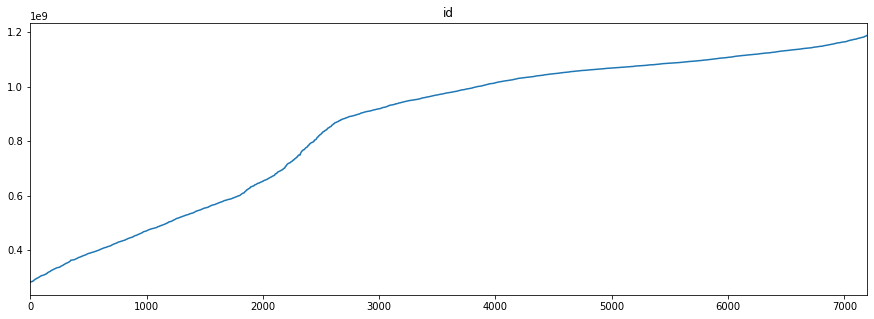

could not graph: track_name


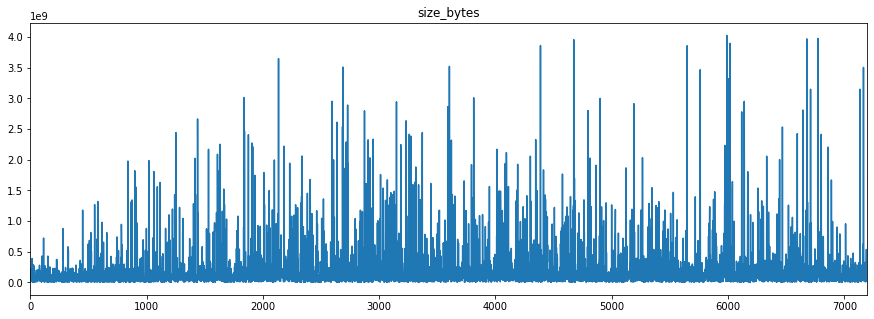

could not graph: app_desc


In [36]:
nograph = []
for d in df_a_all.columns:
    try:
        df_a_all[d].plot(figsize=(15, 5))
        plt.title(d)
        plt.show()
    except:
        print('could not graph: {}'.format(d))
        nograph.append(d)
        continue

In [31]:
nograph

['track_nameid', 'currency', 'ver', 'prime_genre', 'track_name', 'app_desc']

In [43]:
df_a_all.columns

Index(['Unnamed: 0', 'idid', 'track_nameid', 'size_bytesid', 'currency',
       'price', 'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'id',
       'track_name', 'size_bytes', 'app_desc'],
      dtype='object')

In [14]:
for d in nograph:
    print('column name: {}'.format(d))
    print(df_a_all[d][0])
    print('\n')

column name: track_nameid
PAC-MAN Premium


column name: currency
USD


column name: ver
6.3.5


column name: cont_rating
4+


column name: prime_genre
Games


column name: track_name
PAC-MAN Premium


column name: app_desc
SAVE 20%, now only $3.99 for a limited time!

One of the most popular video games in arcade history!
2015 World Video Game Hall of Fame Inductee

Who can forget the countless hours and quarters spent outrunning pesky ghosts and chompin’ on dots? Now you can have the same arcade excitement on your mobile devices! 
Guide PAC-MAN through the mazes with easy swipe controls, a MFi controller, or kick it old school with the onscreen joystick!
Eat all of the dots to advance to the next stage. Go for high scores and higher levels! Gain an extra life at 10.000 points! Gobble Power Pellets to weaken ghosts temporarily and eat them up before they change back. Avoid Blinky, the leader of the ghosts, and his fellow ghosts Pinky, Inky, and Clyde, or you will lose a life. It’s gam

In [ ]:
# appleStore.csv

# "id" : App ID
# "track_name": App Name
# "size_bytes": Size (in Bytes)
# "currency": Currency Type
# "price": Price amount
# "ratingcounttot": User Rating counts (for all version)
# "ratingcountver": User Rating counts (for current version)
# "user_rating" : Average User Rating value (for all version)
# "userratingver": Average User Rating value (for current version)
# "ver" : Latest version code
# "cont_rating": Content Rating
# "prime_genre": Primary Genre
# "sup_devices.num": Number of supporting devices
# "ipadSc_urls.num": Number of screenshots showed for display
# "lang.num": Number of supported languages
# "vpp_lic": Vpp Device Based Licensing Enabled

In [ ]:
#further exploration
#user rating, user rating ver, sup_devices.num, ipadSc_urls.num, lang.num, vpp_llc
#user rating vs user rating ver
#average rating overall compared to current user rating of newest version
#



In [15]:
df_a_all.head()

,Unnamed: 0,idid,track_nameid,size_bytesid,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,...,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,id,track_name,size_bytes,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,...,4+,Games,38,5,10,1,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,...,4+,Productivity,37,5,23,1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,...,4+,Weather,37,5,3,1,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,...,12+,Shopping,37,5,9,1,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,...,4+,Reference,37,5,45,1,282935706,Bible,92774400,On more than 250 million devices around the wo...


In [18]:
df_a_all['cont_rating'].unique()

array(['4+', '12+', '17+', '9+'], dtype=object)

In [26]:
int(df_a_all['cont_rating'][3].split('+')[0])

12

In [34]:
def removeplus(x):
    return int(x.split('+')[0])

In [35]:
df_a_all['cont_rating'] = df_a_all['cont_rating'].apply(removeplus)

In [ ]:
#vpp_llc
#allows for multiple device usage without apple ID
#you can share the app between different people ?
#https://www.jamf.com/jamf-nation/articles/418/moving-from-user-to-device-based-volume-purchasing-assignments

# Google

In [62]:
df_g.shape, df_g_d.shape

((10841, 13), (64295, 5))

In [67]:
df_g['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [37]:
df_g.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [82]:
df_g_d.App.unique().size

1074

In [46]:
app_counts = {}
for x in df_g.App:
    count = 0
    for y in df_g_d.App:
        if x == y:
            count += 1
    app_counts[x] = count

In [48]:
app_counts.values

<function dict.values>

In [ ]:
#how many reviews in df_g_d for the app in df_g

In [49]:
app_counts

{'Photo Editor & Candy Camera & Grid & ScrapBook': 0,
 'Coloring book moana': 58,
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps': 0,
 'Sketch - Draw & Paint': 0,
 'Pixel Draw - Number Art Coloring Book': 0,
 'Paper flowers instructions': 0,
 'Smoke Effect Photo Maker - Smoke Editor': 0,
 'Infinite Painter': 0,
 'Garden Coloring Book': 100,
 'Kids Paint Free - Drawing Fun': 0,
 'Text on Photo - Fonteee': 0,
 'Name Art Photo Editor - Focus n Filters': 0,
 'Tattoo Name On My Photo Editor': 0,
 'Mandala Coloring Book': 0,
 '3D Color Pixel by Number - Sandbox Art Coloring': 40,
 'Learn To Draw Kawaii Characters': 0,
 'Photo Designer - Write your name with shapes': 0,
 '350 Diy Room Decor Ideas': 0,
 'FlipaClip - Cartoon animation': 40,
 'ibis Paint X': 0,
 'Logo Maker - Small Business': 0,
 "Boys Photo Editor - Six Pack & Men's Suit": 40,
 'Superheroes Wallpapers | 4K Backgrounds': 0,
 'Mcqueen Coloring pages': 0,
 'HD Mickey Minnie Wallpapers': 0,
 'Harley Quinn wallpapers HD': 0,
 

In [54]:
nums = 0
for x in app_counts.values():
    if (x > 0):
        nums += 1

In [57]:
nums, sum(app_counts.values())

(1020, 61556)

In [38]:
df_g_d.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [40]:
df_g_d.shape

(64295, 5)

In [ ]:
def addTranslatedReviews(x)

In [68]:
df_g_groupbyApp = df_g_d.groupby('App').sum()

In [84]:
df_g_groupbyApp.shape

(1074, 2)

In [69]:
df_g_groupbyApp

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,91.322167,96.118215
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,15.696183,21.820651
11st,7.251769,17.758277
1800 Contacts - Lens Store,25.451582,47.287879
1LINE – One Line with One Touch,7.459031,21.177982
...,...,...
Hotspot Shield Free VPN Proxy & Wi-Fi Security,8.560000,13.371667
Hotstar,1.221690,15.806851
Hotwire Hotel & Car Rental App,6.171972,15.170675


In [43]:
df_g_d.groupby('App').mean()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.181294,0.443957
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964
Hotwire Hotel & Car Rental App,0.187029,0.459717


In [44]:
df_g_d.groupby('App').count()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,194,194,194,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,40,40,40,40
11st,39,40,40,40
1800 Contacts - Lens Store,80,80,80,80
1LINE – One Line with One Touch,38,38,38,38
...,...,...,...,...
Hotspot Shield Free VPN Proxy & Wi-Fi Security,34,34,34,34
Hotstar,32,32,32,32
Hotwire Hotel & Car Rental App,33,33,33,33


In [87]:
df_g.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## clean features

In [88]:
df_g.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [91]:
df_g['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [119]:
# Python3 code to demonstrate working of 
# Splitting text and number in string  
# Using re.compile() + re.match() + re.groups() 
import re 
  
# initializing string  
test_str = "test21234"
  
# printing original string  
#print("The original string is : " + str(test_str)) 
  
# Using re.compile() + re.match() + re.groups() 
# Splitting text and number in string  
temp = re.compile("([a-zA-Z]+)([0-9]+)") 
print(type(temp.match(test_str).groups()))
print(type(temp))
#res = temp.match(test_str).groups() 
  
# printing result  
#print("The tuple after the split of string and number : " + str(res))
#print(res[1])

<class 'tuple'>
<class 're.Pattern'>


In [149]:
df_g['Reviews'].apply(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '3.0M'

In [124]:
du = re.compile("([a-zA-Z]+)([0-9]+)")
print(type(du))
print(type(du.match('m234')))

t = "234m"
#temp = re.compile("([a-zA-Z]+)([0-9]+)")
type(temp.match(t))

<class 're.Pattern'>
<class 're.Match'>


NoneType

In [150]:
reg = re.compile('([0-9.]+)([a-zA-Z]+)')
test = '3.0M'
reg.match(test).groups()

('3.0', 'M')

In [175]:
res = ('3.0', 'M')
f = (float(res[0]), res[1])
f

(3.0, 'M')

In [ ]:
#types of data
#123mks
#mks123
#asdf
#1234
#123lkj123
#asdf1234las

In [196]:
t = '2onlyletters'
t.isalpha()

False

In [197]:
np.nan

nan

In [202]:
import re
#returns number only
#to do list: apply value of letter to number
def separateLetters(x):
    if x == 'Varies with Device': #only letters
        print('in letters if')
        return np.nan
    reg = re.compile("([0-9.]+)([a-zA-Z]+)") #numbers first
    reg2 = re.compile('([a-zA-Z]+)([0-9]+)') #letters first
    f = None
    try:
        #numbers first
        res = reg.match(x).groups()
        f = (float(res[0]), res[1])
    except:
        #print('in exception of numbers first')
        try:
            res = reg2.match(x).groups()
            #print('in letters first')
            #have to flip tuple
            f = (float(res[1]), res[0])
        except:
            #only numbers or letters
            #print('in exception of letters first')
            if x.isdigit(): #only numbers
                return float(x)
            else: #not convertible
                print('different combination of letters and numbers: {}'.format(x))
                return x
    #res[0] = number, res[1], letter
    if f[1] == 'k': #kilo
        return (f[0] * 1000)
    elif f[1] == 'M': #1e6
        return (f[0] * 1000000)
    else:
        print('different letter, pls update : {}'.format(f[1]))
        return f[0]
print(separateLetters('Varies with Device'))

different combination of letters and numbers: Varies with Device
Varies with Device


In [152]:
letters = []
for x in df_g['Reviews'].unique():
    let = separateLetters(x)
    if let != -1:
        letters.append(separateLetters(x))

In [153]:
letters

['M']

In [148]:
df_g['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [159]:
df_g['Reviews'].shape

(10841,)

In [ ]:
# could not graph: Size , type: <class 'str'>
# could not graph: Installs , type: <class 'str'>
# could not graph: Type , type: <class 'str'>
# could not graph: Price , type: <class 'str'>
# could not graph: Content Rating , type: <class 'str'>
# could not graph: Genres , type: <class 'str'>
# could not graph: Last Updated , type: <class 'str'>
# could not graph: Current Ver , type: <class 'str'>
# could not graph: Android Ver , type: <class 'str'>

In [199]:
df_g['Size'].apply(separateLetters)

different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of letters and numbers: Varies with device
different combination of 

0                   1.9e+07
1                   1.4e+07
2                   8.7e+06
3                   2.5e+07
4                   2.8e+06
                ...        
10836               5.3e+07
10837               3.6e+06
10838               9.5e+06
10839    Varies with device
10840               1.9e+07
Name: Size, Length: 10841, dtype: object

## clean reviews

In [ ]:
# be sure to add the letters value to the number

In [162]:
df_g['Reviews'] = df_g['Reviews'].apply(separateLetters)
    

## clean size

## clean Installs

## clean type

could not graph: App , type: <class 'str'>
could not graph: Category , type: <class 'str'>


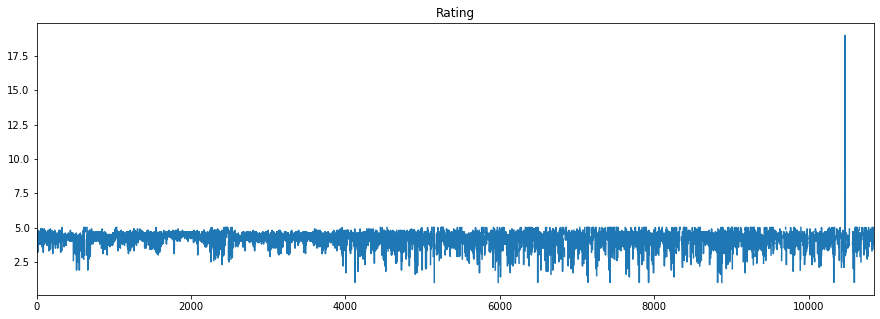

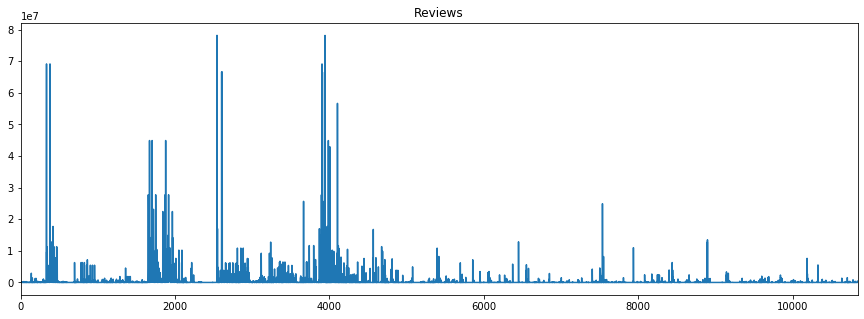

could not graph: Size , type: <class 'str'>
could not graph: Installs , type: <class 'str'>
could not graph: Type , type: <class 'str'>
could not graph: Price , type: <class 'str'>
could not graph: Content Rating , type: <class 'str'>
could not graph: Genres , type: <class 'str'>
could not graph: Last Updated , type: <class 'str'>
could not graph: Current Ver , type: <class 'str'>
could not graph: Android Ver , type: <class 'str'>


In [163]:
nograph_g = []
for d in df_g.columns:
    try:
        df_g[d].plot(figsize=(15, 5))
        plt.title(d)
        plt.show()
    except:
        print('could not graph: {} , type: {}'.format(d, type(df_g[d][0])))
        
        nograph.append(d)
        continue